In [1]:
## Import global variables, tools, libraries and functions
import global_vars
import importlib
importlib.reload(global_vars)
execfile('global_vars.py')

Text(0, 0.5, 'State/Forcing')

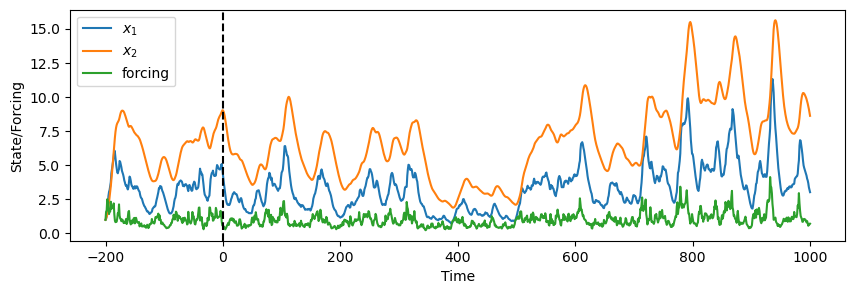

In [2]:
## True model runs with added noise

## use the following parameters illustrating the two types of behaviour
#g_paramtrue=[1.0,1.0,0.2,0.1] # active biosphere
#g_paramtrue=[1.0,1.0,0.4,0.1] # flipping between active and dormant biosphere
#g_paramtrue=[2.75,2.75,0.465,0.065] # check the midpoints of the parameter intervals

MR=modelruns_class.modelruns_class(g_x0, g_tf+g_discard, g_deltat, g_forcing_long, g_paramtrue)
xtrue_traj_long=MR.xf

## Add noise:
switch = 1 # 1 to add noise, 0 to leave observations without noise added
mean = np.zeros(2)
cov = np.eye(2)
omega=np.random.multivariate_normal(mean,cov,g_tf+g_discard+1)
noise=switch*g_obs_err*omega
xtrue_noise_long=xtrue_traj_long+noise.T
xtrue_noise=xtrue_traj_long[:,g_discard:g_discard+g_tf+1]   

## Save model run files
filepath = '/Users/nataliedouglas/Documents/Research/Reading University Work/ToyCarbonModel_GitHub_Final'
#np.save(filepath+'/Model Runs/xtrue_noisy_paramsref.npy',xtrue_noise)
#np.save(filepath+'/Model Runs/xtrue_noisy_paramsA1-A11.npy',xtrue_noise)
#np.save(filepath+'/Model Runs/xtrue_noisy_paramsB1-B6.npy',xtrue_noise)
#np.save(filepath+'/Model Runs/xtrue_noisy_paramsC1.npy',xtrue_noise)
#np.save(filepath+'/Model Runs/xtrue_noisy_paramsC2.npy',xtrue_noise)
#np.save(filepath+'/Model Runs/xtrue_noisy_paramsC3.npy',xtrue_noise)
#np.save(filepath+'/Model Runs/xtrue_noisy_paramsC4.npy',xtrue_noise)

## Plot current model run
plt.figure(figsize=(10,3))
plt.plot(g_t1-g_discard,xtrue_traj_long[0],label=r'$x_1$')
plt.plot(g_t1-g_discard,xtrue_traj_long[1],label=r'$x_2$')
#plt.plot(g_t1-g_discard,xtrue_noise_long[0],label=r'$x_1$')
#plt.plot(g_t1-g_discard,xtrue_noise_long[1],label=r'$x_2$')
plt.plot(g_t1-g_discard,g_forcing_long,label='forcing')
plt.axvline(0,color='k', linestyle='dashed')
plt.legend()
plt.xlabel('Time')
plt.ylabel('State/Forcing')

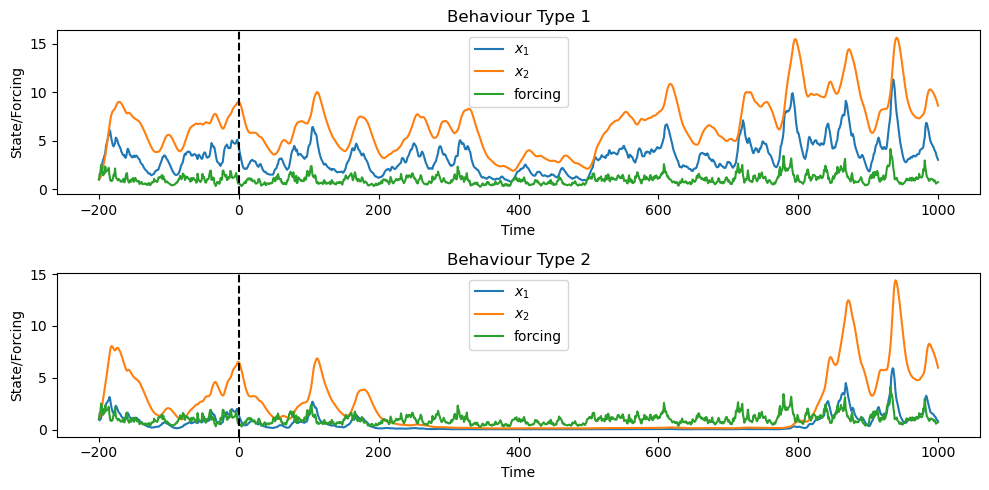

In [3]:
g_param_ref1=[1.0,1.0,0.2,0.1] # active biosphere
g_param_ref2=[1.0,1.0,0.4,0.1] # flipping between active and dormant biosphere

MR1=modelruns_class.modelruns_class(g_x0, g_tf+g_discard, g_deltat, g_forcing_long, g_param_ref1)
xtrue_ref1=MR1.xf

MR2=modelruns_class.modelruns_class(g_x0, g_tf+g_discard, g_deltat, g_forcing_long, g_param_ref2)
xtrue_ref2=MR2.xf

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(g_t1-g_discard,xtrue_ref1[0],label=r'$x_1$')
plt.plot(g_t1-g_discard,xtrue_ref1[1],label=r'$x_2$')
plt.plot(g_t1-g_discard,g_forcing_long,label='forcing')
plt.axvline(0,color='k', linestyle='dashed')
plt.legend()
plt.xlabel('Time')
plt.ylabel('State/Forcing')
plt.title('Behaviour Type 1')

plt.subplot(2,1,2)
plt.plot(g_t1-g_discard,xtrue_ref2[0],label=r'$x_1$')
plt.plot(g_t1-g_discard,xtrue_ref2[1],label=r'$x_2$')
plt.plot(g_t1-g_discard,g_forcing_long,label='forcing')
plt.axvline(0,color='k', linestyle='dashed')
plt.legend()
plt.xlabel('Time')
plt.ylabel('State/Forcing')
plt.title('Behaviour Type 2')

plt.tight_layout()
